# Spotting Influences in Social Networks

Dataset Description :

Graph data
- member-to-group-edges.csv: Edge list for constructing a - member-to-group bipartite graph. Weights represent number of events attended in each group.
- group-edges.csv: Edge list for constructing a group-to-group graph. Weights represent shared members between groups.
- member-edges.csv: Edge list for constructing a member-to-member graph. Weights represent shared group membership.
- rsvps.csv: Raw member-to-event attendance data, which was aggregated to form member-to-group-edges.csv.

Metadata

- meta-groups.csv: Information for each group, including name and category. group_id can serve as index.
- meta-members.csv: Information for each member, including name and location. member_id can serve as index.
- meta-events.csv: Information for each event, including name and time. event_id can serve as index.

Dataset found in kaggle at https://www.kaggle.com/datasets/stkbailey/nashville-meetup

## Importing the Headerfiles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import pylab as pyl
import networkx as nx
%matplotlib inline

Importing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/member-edges.csv", on_bad_lines = 'skip')

In [5]:
df.shape

(1176368, 4)

In [6]:
df.head()

Unnamed: 0    member1    member2  weight
0           0  198737924  220654721       1
1           1  198737924  208201738       1
2           2  198737924   88664332       1
3           3  198737924    8640526       1
4           4  198737924   56356372       1

In [7]:
df = df[0:2000]
edge_list=[]
for i in range(0,2000):
 edge_list.append([df.loc[i,'member1'], df.loc[i,'member2']])
edge_list

[[198737924, 220654721],
 [198737924, 208201738],
 [198737924, 88664332],
 [198737924, 8640526],
 [198737924, 56356372],
 [198737924, 183880473],
 [198737924, 194617630],
 [198737924, 185626278],
 [198737924, 8809394],
 [198737924, 193825984],
 [198737924, 145838912],
 [198737924, 182472899],
 [198737924, 8998727],
 [198737924, 3036107],
 [198737924, 127853262],
 [198737924, 209148366],
 [198737924, 207093714],
 [198737924, 204969170],
 [198737924, 156443612],
 [198737924, 12916961],
 [198737924, 66842212],
 [198737924, 216446825],
 [198737924, 183097071],
 [198737924, 212660721],
 [198737924, 160810612],
 [198737924, 200806774],
 [198737924, 154764282],
 [198737924, 14497407],
 [73498632, 66999812],
 [73498632, 221126666],
 [73498632, 197747724],
 [73498632, 91563022],
 [73498632, 10798095],
 [73498632, 201765390],
 [73498632, 204465678],
 [73498632, 207654954],
 [73498632, 188889135],
 [73498632, 53159472],
 [73498632, 192814642],
 [73498632, 197681727],
 [73498632, 189163080],
 [734

In [8]:

pd.set_option('precision',10)
Graph = nx.from_pandas_edgelist(df,'member1','member2',create_using=nx.Graph())


In [9]:
nodes=Graph.nodes()
nodes

NodeView((198737924, 220654721, 208201738, 88664332, 8640526, 56356372, 183880473, 194617630, 185626278, 8809394, 193825984, 145838912, 182472899, 8998727, 3036107, 127853262, 209148366, 207093714, 204969170, 156443612, 12916961, 66842212, 216446825, 183097071, 212660721, 160810612, 200806774, 154764282, 14497407, 73498632, 66999812, 221126666, 197747724, 91563022, 10798095, 201765390, 204465678, 207654954, 188889135, 53159472, 192814642, 197681727, 189163080, 223143499, 141761102, 26324562, 216567379, 202135638, 150355032, 212232797, 117939302, 211518566, 230659176, 26285162, 222579306, 45382252, 183766136, 192131215, 189705878, 185636517, 109335722, 184418986, 144256692, 220919480, 42441402, 238843578, 183370428, 13579455, 35275462, 205336779, 184175830, 218384086, 198681310, 151512802, 195517167, 182863105, 213190404, 14144267, 238077203, 221803801, 235847459, 56588072, 44125492, 127366452, 80835382, 26301242, 222674749, 200374078, 221257542, 174868302, 27567952, 217355604, 20520278

In [10]:
deg=Graph.degree()
deg

DegreeView({198737924: 28, 220654721: 1, 208201738: 1, 88664332: 1, 8640526: 1, 56356372: 1, 183880473: 1, 194617630: 1, 185626278: 1, 8809394: 1, 193825984: 1, 145838912: 1, 182472899: 2, 8998727: 1, 3036107: 1, 127853262: 1, 209148366: 1, 207093714: 1, 204969170: 1, 156443612: 1, 12916961: 1, 66842212: 1, 216446825: 1, 183097071: 1, 212660721: 1, 160810612: 2, 200806774: 1, 154764282: 1, 14497407: 1, 73498632: 88, 66999812: 1, 221126666: 1, 197747724: 1, 91563022: 1, 10798095: 1, 201765390: 1, 204465678: 1, 207654954: 3, 188889135: 1, 53159472: 1, 192814642: 1, 197681727: 1, 189163080: 1, 223143499: 1, 141761102: 1, 26324562: 1, 216567379: 1, 202135638: 1, 150355032: 1, 212232797: 1, 117939302: 1, 211518566: 1, 230659176: 1, 26285162: 1, 222579306: 1, 45382252: 1, 183766136: 1, 192131215: 1, 189705878: 1, 185636517: 1, 109335722: 1, 184418986: 1, 144256692: 3, 220919480: 1, 42441402: 1, 238843578: 1, 183370428: 1, 13579455: 1, 35275462: 1, 205336779: 1, 184175830: 1, 218384086: 1, 19

In [11]:
colors=[deg[x] for x in nodes]
colors

[28,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 88,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 52,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 137,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,

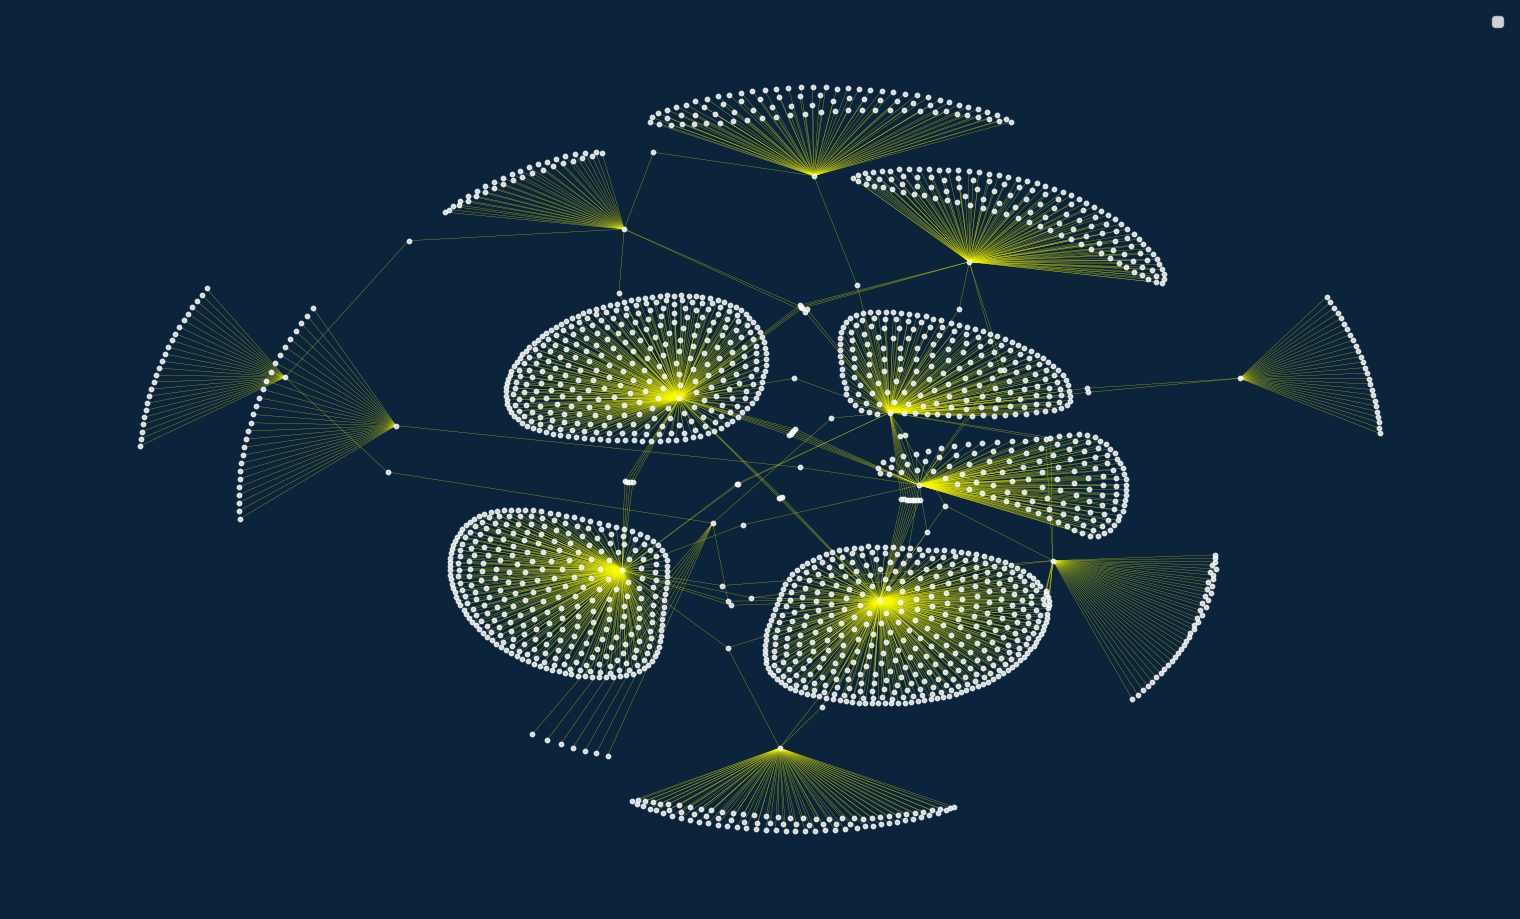

In [12]:
pos=nx.kamada_kawai_layout(Graph)
cmap=plt.cm.viridis_r
cmap=plt.cm.Greys
vmin = min(colors)
vmax=max(colors)
fig = plt.figure(figsize = (15, 9 ), dpi =100)
nx.draw(Graph, pos, alpha=0.8,nodelist=nodes, node_color='w', node_size=10, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='yellow')
fig.set_facecolor('#0B243B')
plt.legend()
plt.show()

In [13]:
for i in sorted(Graph.nodes()):
  Graph.nodes[i]['Degree']=Graph.degree[i]

In [14]:
Graph.nodes

NodeView((198737924, 220654721, 208201738, 88664332, 8640526, 56356372, 183880473, 194617630, 185626278, 8809394, 193825984, 145838912, 182472899, 8998727, 3036107, 127853262, 209148366, 207093714, 204969170, 156443612, 12916961, 66842212, 216446825, 183097071, 212660721, 160810612, 200806774, 154764282, 14497407, 73498632, 66999812, 221126666, 197747724, 91563022, 10798095, 201765390, 204465678, 207654954, 188889135, 53159472, 192814642, 197681727, 189163080, 223143499, 141761102, 26324562, 216567379, 202135638, 150355032, 212232797, 117939302, 211518566, 230659176, 26285162, 222579306, 45382252, 183766136, 192131215, 189705878, 185636517, 109335722, 184418986, 144256692, 220919480, 42441402, 238843578, 183370428, 13579455, 35275462, 205336779, 184175830, 218384086, 198681310, 151512802, 195517167, 182863105, 213190404, 14144267, 238077203, 221803801, 235847459, 56588072, 44125492, 127366452, 80835382, 26301242, 222674749, 200374078, 221257542, 174868302, 27567952, 217355604, 20520278

In [15]:
df_nodes = pd.DataFrame([i[1] for i in Graph.nodes(data=True)], index=[i[0] for i in Graph.nodes(data=True)])
df_nodes=df_nodes.sort_values(by='Degree', ascending='False')



In [16]:
df_nodes.head(), df_nodes.tail()

(           Degree
 11014949        1
 128869902       1
 12668425        1
 235410949       1
 203361789       1,            Degree
 182648870     146
 217350178     213
 226754592     344
 234684445     359
 205193250     441)

In [17]:
df_nodes.shape

(1947, 1)

In [18]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 11014949 to 205193250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Degree  1947 non-null   int64
dtypes: int64(1)
memory usage: 30.4 KB


In [19]:
df_nodes.index.names=['NodeID']

In [20]:
df_nodes.reset_index(level=0, inplace=True)
df_nodes

NodeID  Degree
0      11014949       1
1     128869902       1
2      12668425       1
3     235410949       1
4     203361789       1
...         ...     ...
1942  182648870     146
1943  217350178     213
1944  226754592     344
1945  234684445     359
1946  205193250     441

[1947 rows x 2 columns]

# Community Detection

In [21]:
!pip install scikit-network


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 8.1 MB 3.7 MB/s 


In [22]:
from sknetwork.data import from_edge_list
adjacency = from_edge_list(edge_list)


In [23]:
type(adjacency)

sknetwork.utils.Bunch

In [24]:
adjacency

{'names': array([   509953,    520451,   1000328, ..., 238843578, 239124265,
        239371029]),
 'adjacency': <1947x1947 sparse matrix of type '<class 'numpy.int64'>'
 	with 4000 stored elements in Compressed Sparse Row format>}

In [25]:
import community.community_louvain as cl
import matplotlib.cm as cm


In [26]:
partition = cl.best_partition(Graph)
pos = nx.spring_layout(Graph)


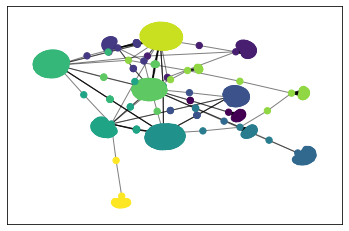

In [27]:
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(Graph, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(Graph, pos, alpha=0.5)
plt.show()

In [28]:
partition

{198737924: 0,
 220654721: 0,
 208201738: 0,
 88664332: 0,
 8640526: 0,
 56356372: 0,
 183880473: 0,
 194617630: 0,
 185626278: 0,
 8809394: 0,
 193825984: 0,
 145838912: 0,
 182472899: 0,
 8998727: 0,
 3036107: 0,
 127853262: 0,
 209148366: 0,
 207093714: 0,
 204969170: 0,
 156443612: 0,
 12916961: 0,
 66842212: 0,
 216446825: 0,
 183097071: 0,
 212660721: 0,
 160810612: 0,
 200806774: 0,
 154764282: 0,
 14497407: 0,
 73498632: 1,
 66999812: 1,
 221126666: 1,
 197747724: 1,
 91563022: 1,
 10798095: 1,
 201765390: 1,
 204465678: 1,
 207654954: 1,
 188889135: 1,
 53159472: 1,
 192814642: 1,
 197681727: 1,
 189163080: 1,
 223143499: 1,
 141761102: 1,
 26324562: 1,
 216567379: 1,
 202135638: 1,
 150355032: 1,
 212232797: 1,
 117939302: 1,
 211518566: 1,
 230659176: 1,
 26285162: 1,
 222579306: 1,
 45382252: 1,
 183766136: 1,
 192131215: 1,
 189705878: 1,
 185636517: 1,
 109335722: 1,
 184418986: 1,
 144256692: 1,
 220919480: 1,
 42441402: 1,
 238843578: 1,
 183370428: 1,
 13579455: 1,
 35

In [29]:
partition.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [30]:
l=list(partition.values())
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [31]:
np.unique(l)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
bet_cent=nx.betweenness_centrality(Graph)
bet_cent



{198737924: 0.02655001228543423,
 220654721: 0.0,
 208201738: 0.0,
 88664332: 0.0,
 8640526: 0.0,
 56356372: 0.0,
 183880473: 0.0,
 194617630: 0.0,
 185626278: 0.0,
 8809394: 0.0,
 193825984: 0.0,
 145838912: 0.0,
 182472899: 0.013682010689648796,
 8998727: 0.0,
 3036107: 0.0,
 127853262: 0.0,
 209148366: 0.0,
 207093714: 0.0,
 204969170: 0.0,
 156443612: 0.0,
 12916961: 0.0,
 66842212: 0.0,
 216446825: 0.0,
 183097071: 0.0,
 212660721: 0.0,
 160810612: 0.013682010689648796,
 200806774: 0.0,
 154764282: 0.0,
 14497407: 0.0,
 73498632: 0.08559933804703393,
 66999812: 0.0,
 221126666: 0.0,
 197747724: 0.0,
 91563022: 0.0,
 10798095: 0.0,
 201765390: 0.0,
 204465678: 0.0,
 207654954: 0.05462587223374498,
 188889135: 0.0,
 53159472: 0.0,
 192814642: 0.0,
 197681727: 0.0,
 189163080: 0.0,
 223143499: 0.0,
 141761102: 0.0,
 26324562: 0.0,
 216567379: 0.0,
 202135638: 0.0,
 150355032: 0.0,
 212232797: 0.0,
 117939302: 0.0,
 211518566: 0.0,
 230659176: 0.0,
 26285162: 0.0,
 222579306: 0.0,
 45

In [33]:
df

Unnamed: 0    member1    member2  weight
0              0  198737924  220654721       1
1              1  198737924  208201738       1
2              2  198737924   88664332       1
3              3  198737924    8640526       1
4              4  198737924   56356372       1
...          ...        ...        ...     ...
1995        1995  182648870  214947628       1
1996        1996  182648870  213203760       1
1997        1997  182648870   12202811       1
1998        1998  182648870   34526012       1
1999        1999  182648870  220299075       1

[2000 rows x 4 columns]

In [34]:
    clo_cent=nx.closeness_centrality(Graph)
    df_cloc=pd.DataFrame.from_dict(clo_cent, orient='index')
    df_cloc

0
198737924  0.2057299926
220654721  0.1706418800
208201738  0.1706418800
88664332   0.1706418800
8640526    0.1706418800
...                 ...
214947628  0.2438596491
213203760  0.2438596491
12202811   0.2438596491
34526012   0.2438596491
220299075  0.2438596491

[1947 rows x 1 columns]

In [35]:
bet_cent=nx.betweenness_centrality(Graph)

In [36]:
keys = list(bet_cent.keys())
values=list(bet_cent.values())
kvdata = list(zip(keys, values))
df_bet_cent = pd.DataFrame(kvdata,columns=['NodeID','Betweeness'])
df_bet_cent

NodeID    Betweeness
0     198737924  0.0265500123
1     220654721  0.0000000000
2     208201738  0.0000000000
3      88664332  0.0000000000
4       8640526  0.0000000000
...         ...           ...
1942  214947628  0.0000000000
1943  213203760  0.0000000000
1944   12202811  0.0000000000
1945   34526012  0.0000000000
1946  220299075  0.0000000000

[1947 rows x 2 columns]

In [37]:
def bet_cent():
    bet_cent=nx.betweenness_centrality(Graph)
    keys = list(bet_cent.keys())
    values=list(bet_cent.values())
    kvdata = list(zip(keys, values))
    df_bet_cent = pd.DataFrame(kvdata,columns=['NodeID','Betweeness'])
    return df_bet_cent

In [38]:
def Closeness_cent():
    clo_cent=nx.closeness_centrality(Graph)
    keys = list(clo_cent.keys())
    values=list(clo_cent.values())
    kvdata = list(zip(keys, values))
    df_cloc = pd.DataFrame(kvdata,columns=['NodeID','Closeness'])
    return df_cloc

In [39]:
def EigVec_cent():
    eigvec_cent=nx.eigenvector_centrality_numpy(Graph)
    keys = list(eigvec_cent.keys())
    values=list(eigvec_cent.values())
    kvdata = list(zip(keys, values))
    df_evc = pd.DataFrame(kvdata,columns=['NodeID','EVC'])
    return df_evc

In [40]:
def Degree_cent():
  deg_cent = nx.degree_centrality(Graph)
  keys = list(deg_cent.keys())
  values=list(deg_cent.values())
  kvdata = list(zip(keys, values))
  df_deg = pd.DataFrame(kvdata,columns=['NodeID','Deg_cent'])
  return df_deg


In [41]:
node_comm=[]
for i in np.unique(l):
  t=[]
  for j in partition.keys():
    if(partition[j]==i):
      t.append(j)
  node_comm.append(t)

In [42]:
(node_comm)

[[198737924,
  220654721,
  208201738,
  88664332,
  8640526,
  56356372,
  183880473,
  194617630,
  185626278,
  8809394,
  193825984,
  145838912,
  182472899,
  8998727,
  3036107,
  127853262,
  209148366,
  207093714,
  204969170,
  156443612,
  12916961,
  66842212,
  216446825,
  183097071,
  212660721,
  160810612,
  200806774,
  154764282,
  14497407],
 [73498632,
  66999812,
  221126666,
  197747724,
  91563022,
  10798095,
  201765390,
  204465678,
  207654954,
  188889135,
  53159472,
  192814642,
  197681727,
  189163080,
  223143499,
  141761102,
  26324562,
  216567379,
  202135638,
  150355032,
  212232797,
  117939302,
  211518566,
  230659176,
  26285162,
  222579306,
  45382252,
  183766136,
  192131215,
  189705878,
  185636517,
  109335722,
  184418986,
  144256692,
  220919480,
  42441402,
  238843578,
  183370428,
  13579455,
  35275462,
  205336779,
  184175830,
  218384086,
  198681310,
  151512802,
  195517167,
  182863105,
  213190404,
  14144267,
  23807720

In [43]:
df_cent= bet_cent()
df_temp = Closeness_cent()
df_cent = pd.merge(df_cent, df_temp, on=['NodeID'])
df_temp=EigVec_cent()
df_cent = pd.merge(df_cent, df_temp, on=['NodeID'])
df_temp=Degree_cent()
df_cent = pd.merge(df_cent, df_temp, on=['NodeID'])
df_cent

NodeID    Betweeness     Closeness           EVC      Deg_cent
0     198737924  0.0265500123  0.2057299926  0.0001372481  0.0143884892
1     220654721  0.0000000000  0.1706418800  0.0000065285  0.0005138746
2     208201738  0.0000000000  0.1706418800  0.0000065285  0.0005138746
3      88664332  0.0000000000  0.1706418800  0.0000065285  0.0005138746
4       8640526  0.0000000000  0.1706418800  0.0000065285  0.0005138746
...         ...           ...           ...           ...           ...
1942  214947628  0.0000000000  0.2438596491  0.0002640926  0.0005138746
1943  213203760  0.0000000000  0.2438596491  0.0002640926  0.0005138746
1944   12202811  0.0000000000  0.2438596491  0.0002640926  0.0005138746
1945   34526012  0.0000000000  0.2438596491  0.0002640926  0.0005138746
1946  220299075  0.0000000000  0.2438596491  0.0002640926  0.0005138746

[1947 rows x 5 columns]

In [53]:
    keys = list(partition.keys())
    values=list(partition.values())
    kvdata = list(zip(keys, values))
    df_comm = pd.DataFrame(kvdata,columns=['NodeID','Community'])

In [54]:
df_comm

NodeID  Community
0     198737924          0
1     220654721          0
2     208201738          0
3      88664332          0
4       8640526          0
...         ...        ...
1942  214947628          7
1943  213203760          7
1944   12202811          7
1945   34526012          7
1946  220299075          7

[1947 rows x 2 columns]

In [55]:
df_cent = pd.merge(df_cent, df_comm, on=['NodeID'])

In [56]:
df_cent.head()

NodeID  Betweeness_x     Closeness           EVC      Deg_cent  \
0  198737924  0.0265500123  0.2057299926  0.0001372481  0.0143884892   
1  220654721  0.0000000000  0.1706418800  0.0000065285  0.0005138746   
2  208201738  0.0000000000  0.1706418800  0.0000065285  0.0005138746   
3   88664332  0.0000000000  0.1706418800  0.0000065285  0.0005138746   
4    8640526  0.0000000000  0.1706418800  0.0000065285  0.0005138746   

   Community  
0          0  
1          0  
2          0  
3          0  
4          0

In [99]:
color = ['Black',
'Red',
'White',
'Green',
'Brown',
'Blue',
'Orange',
'Yellow',
'Purple',
'Gray',
'Pink',
'Tan',
'Purple',
 ]

In [108]:
type(nodes)


networkx.classes.reportviews.NodeView

In [116]:
color_map=[]
for i in nodes:
  # print(i)
  x = int(df_cent[df_cent['NodeID'] == i]['Community'])
  color_map.append(color[x])
  # print(x)
  

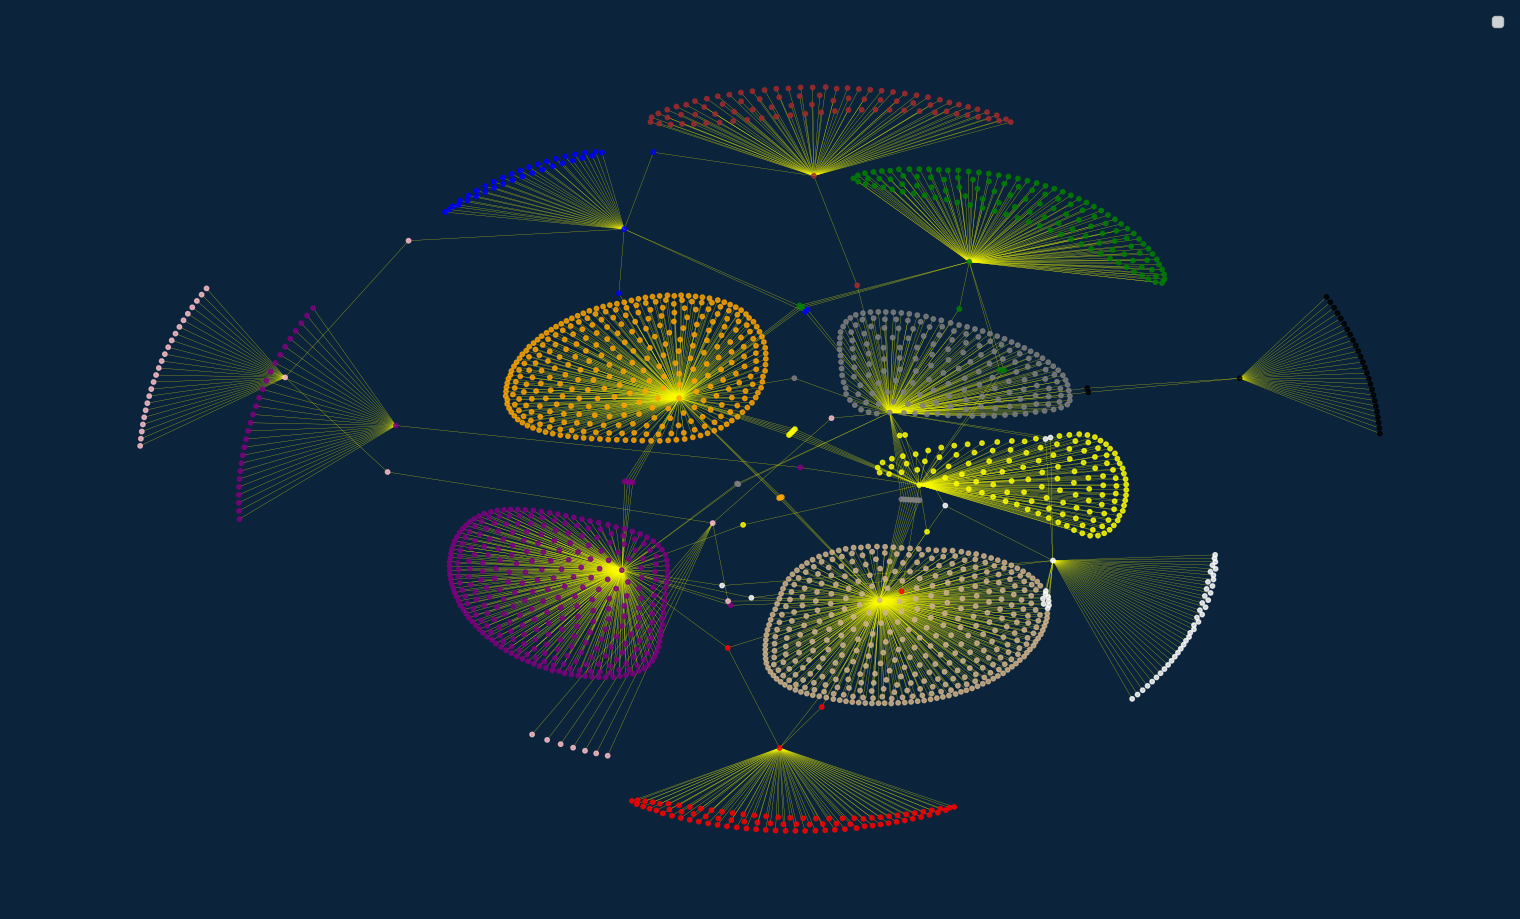

In [117]:
pos=nx.kamada_kawai_layout(Graph)
cmap=plt.cm.viridis_r
cmap=plt.cm.Greys
vmin = min(colors)
vmax=max(colors)
fig = plt.figure(figsize = (15, 9 ), dpi =100)
nx.draw(Graph, pos, alpha=0.8,nodelist=nodes, node_color=color_map, node_size=10, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='yellow')
fig.set_facecolor('#0B243B')
plt.legend()
plt.show()

# Based on Degree Centrality

In [67]:
df_cent=df_cent.sort_values(by=['Community', 'Deg_cent'], ascending=[True, False])

In [70]:
top3 = df_cent.groupby('Community').head(3)

In [71]:
top3

NodeID  Betweeness_x     Closeness           EVC      Deg_cent  \
0     198737924  0.0265500123  0.2057299926  0.0001372481  0.0143884892   
12    182472899  0.0136820107  0.2571353066  0.0013578058  0.0010277492   
25    160810612  0.0136820107  0.2571353066  0.0013578058  0.0010277492   
29     73498632  0.0855993380  0.2472366917  0.0060786789  0.0452209661   
37    207654954  0.0546258722  0.2901013715  0.0353000773  0.0015416238   
62    144256692  0.0576284883  0.2870206490  0.0340890474  0.0015416238   
118   182943766  0.0414592555  0.2537488590  0.0184567724  0.0267214800   
129   223055408  0.0259612262  0.2863449088  0.0358888682  0.0015416238   
139    77062222  0.0177661261  0.2992925254  0.0357650231  0.0015416238   
171   216072216  0.1309310593  0.2493273543  0.0004018934  0.0704008222   
209   207061281  0.0190566727  0.2634714324  0.0013359441  0.0010277492   
210   219866401  0.0131357495  0.2524649715  0.0002832095  0.0010277492   
309   183566364  0.0866592782  0.2140578594  0.0000808510  0.0452209661   
358   217563923  0.0745971955  0.2613483750  0.0013551232  0.0010277492   
310    36431872  0.0000000000  0.1763320043  0.0000038459  0.0005138746   
811    13631520  0.0567905234  0.2311438413  0.0002104294  0.0205549846   
355   204714239  0.0110211233  0.1910090302  0.0000138554  0.0010277492   
409     6209579  0.0301459517  0.2647619048  0.0013268367  0.0010277492   
398   234684445  0.3677048160  0.3407459289  0.0276835259  0.1844809866   
421   161587302  0.0360011826  0.2990165950  0.0348526364  0.0010277492   
581    14486634  0.0360011826  0.2990165950  0.0348526364  0.0010277492   
1813  182648870  0.1838569518  0.3224523612  0.0055519918  0.0750256937   
446     7643395  0.0076638109  0.2723964166  0.0015809198  0.0010277492   
583   157248622  0.0076638109  0.2723964166  0.0015809198  0.0010277492   
849   226754592  0.3239167011  0.3348821201  0.0310113506  0.1767728674   
481   195150281  0.0224672184  0.2902744630  0.0027919496  0.0010277492   
490   108448302  0.0224672184  0.2902744630  0.0027919496  0.0010277492   
1187  217350178  0.3237335835  0.3427866831  0.0284077674  0.1094552929   
639   200750517  0.0507800375  0.2818655852  0.0026681045  0.0010277492   
861    36925522  0.0319004989  0.2876995860  0.0028263998  0.0010277492   
755   200114206  0.0246745081  0.1858821282  0.0000047604  0.0133607400   
1805  230522918  0.0220837613  0.2523013095  0.0017697003  0.0051387461   
1011   27157532  0.0374938464  0.2858401880  0.0350951113  0.0015416238   
1389  205193250  0.4270708668  0.3464482820  0.7050199477  0.2266187050   
1390  102492162  0.0000000000  0.2573393282  0.0335358092  0.0005138746   
1391   66609162  0.0000000000  0.2573393282  0.0335358092  0.0005138746   
782   200769567  0.0275637588  0.1982679572  0.0000134118  0.0143884892   
802   212431440  0.0283775037  0.2455830389  0.0002647305  0.0010277492   
783   158336642  0.0000000000  0.1654761905  0.0000006380  0.0005138746   

      Community  
0             0  
12            0  
25            0  
29            1  
37            1  
62            1  
118           2  
129           2  
139           2  
171           3  
209           3  
210           3  
309           4  
358           4  
310           4  
811           5  
355           5  
409           5  
398           6  
421           6  
581           6  
1813          7  
446           7  
583           7  
849           8  
481           8  
490           8  
1187          9  
639           9  
861           9  
755          10  
1805         10  
1011         10  
1389         11  
1390         11  
1391         11  
782          12  
802          12  
783          12

In [85]:
top3_list = [i for i in top3['NodeID']]

In [89]:
color_map=[]
for i in nodes:
  # print(i)
  
  if i in top3_list:
    # print(i)
    color_map.append('red')
  else:
    color_map.append('white')

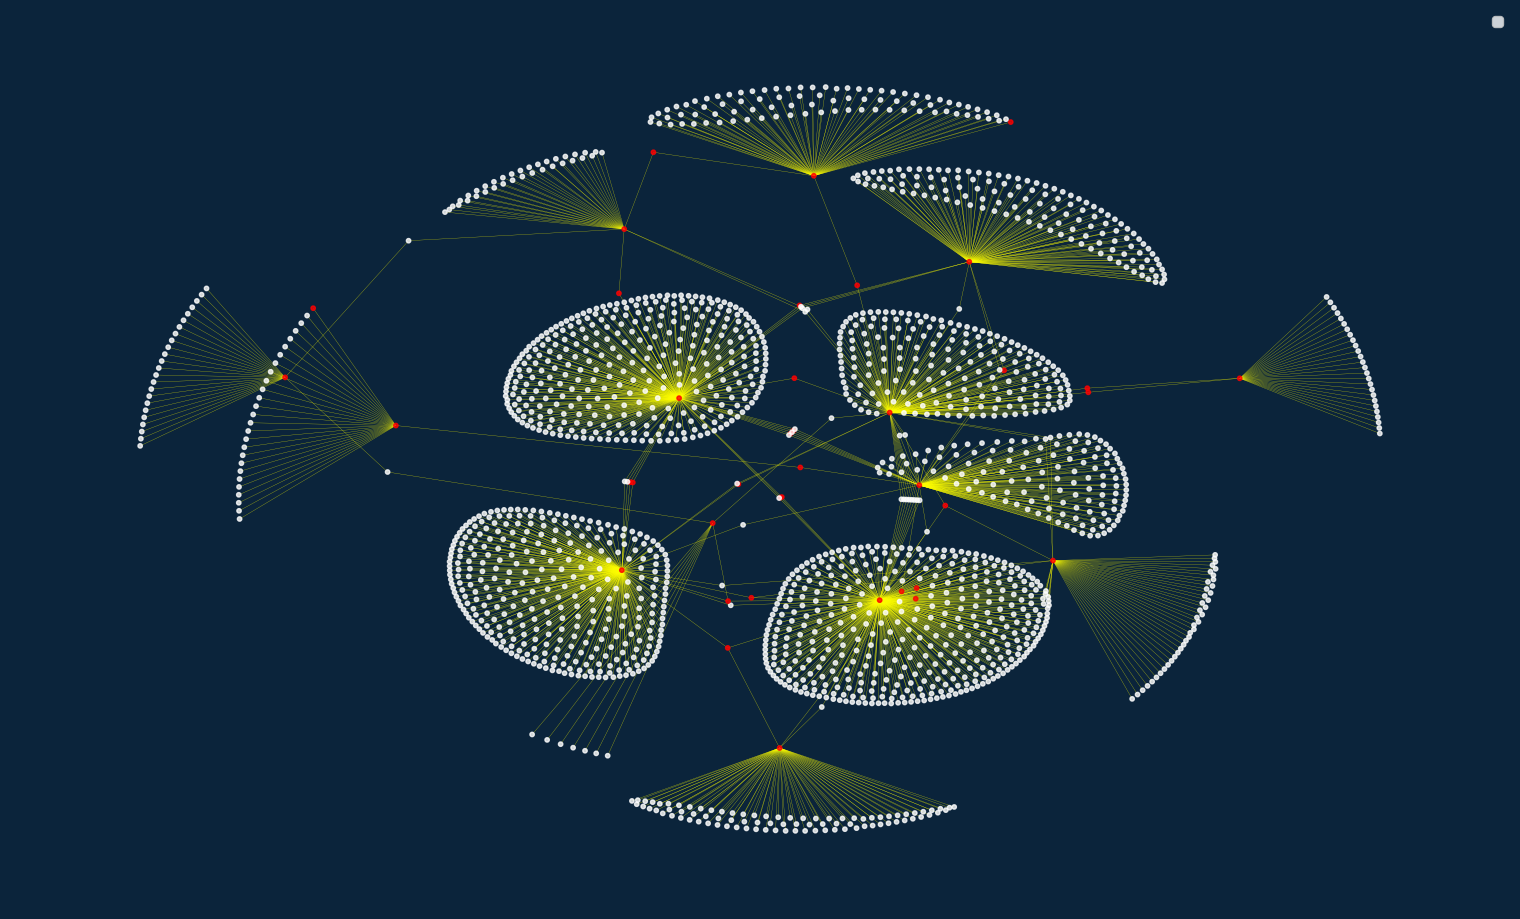

In [90]:
pos=nx.kamada_kawai_layout(Graph)
cmap=plt.cm.viridis_r
cmap=plt.cm.Greys
vmin = min(colors)
vmax=max(colors)
fig = plt.figure(figsize = (15, 9 ), dpi =100)
nx.draw(Graph, pos, alpha=0.8,nodelist=nodes, node_color=color_map, node_size=10, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='yellow')
fig.set_facecolor('#0B243B')
plt.legend()
plt.show()

# To plot influencers

In [97]:
def drawngroup(cent, df_cent):
   df_cent=df_cent.sort_values(by=['Community', cent], ascending=[True, False])
   top3 = df_cent.groupby('Community').head(3)
   top3_list = [i for i in top3['NodeID']]
   color_map=[]
   for i in nodes:
  # print(i)
  
     if i in top3_list:
    # print(i)
       color_map.append('red')
     else:
       color_map.append('white')
   pos=nx.kamada_kawai_layout(Graph)
   cmap=plt.cm.viridis_r
   cmap=plt.cm.Greys
   vmin = min(colors)
   vmax=max(colors)
   fig = plt.figure(figsize = (15, 9 ), dpi =100)
   nx.draw(Graph, pos, alpha=0.8,nodelist=nodes, node_color=color_map, node_size=10, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='yellow')
   fig.set_facecolor('#0B243B')
   plt.legend()
   plt.show()

In [91]:
df_cent.columns

Index(['NodeID', 'Betweeness_x', 'Closeness', 'EVC', 'Deg_cent', 'Community'], dtype='object')

# Spottind influencers by
1. Betweeness
2. Closeness
3. Eigen Vector


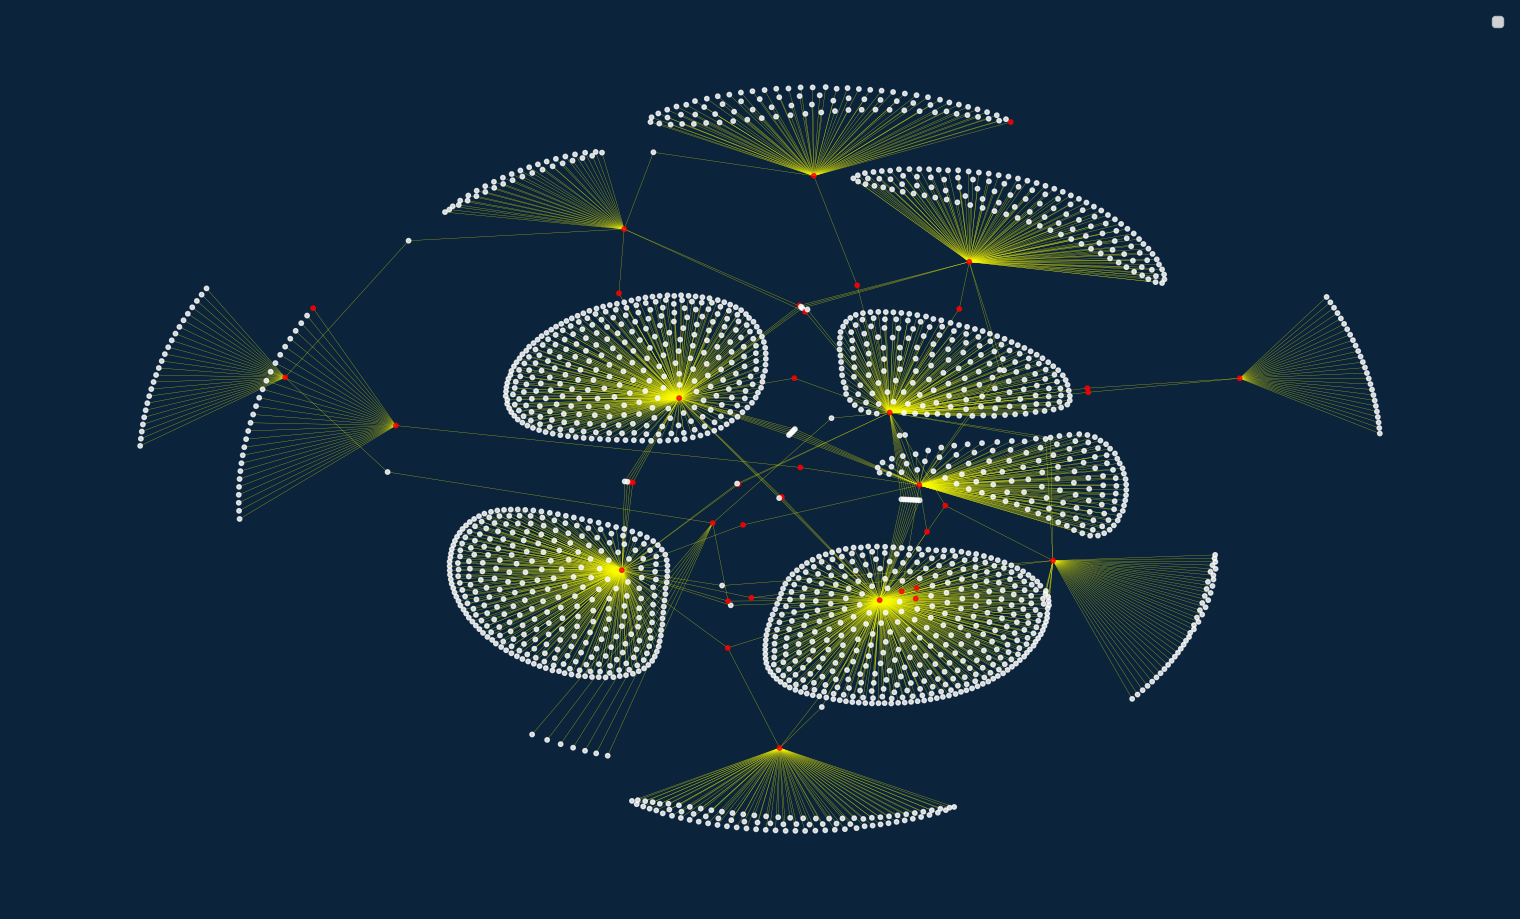

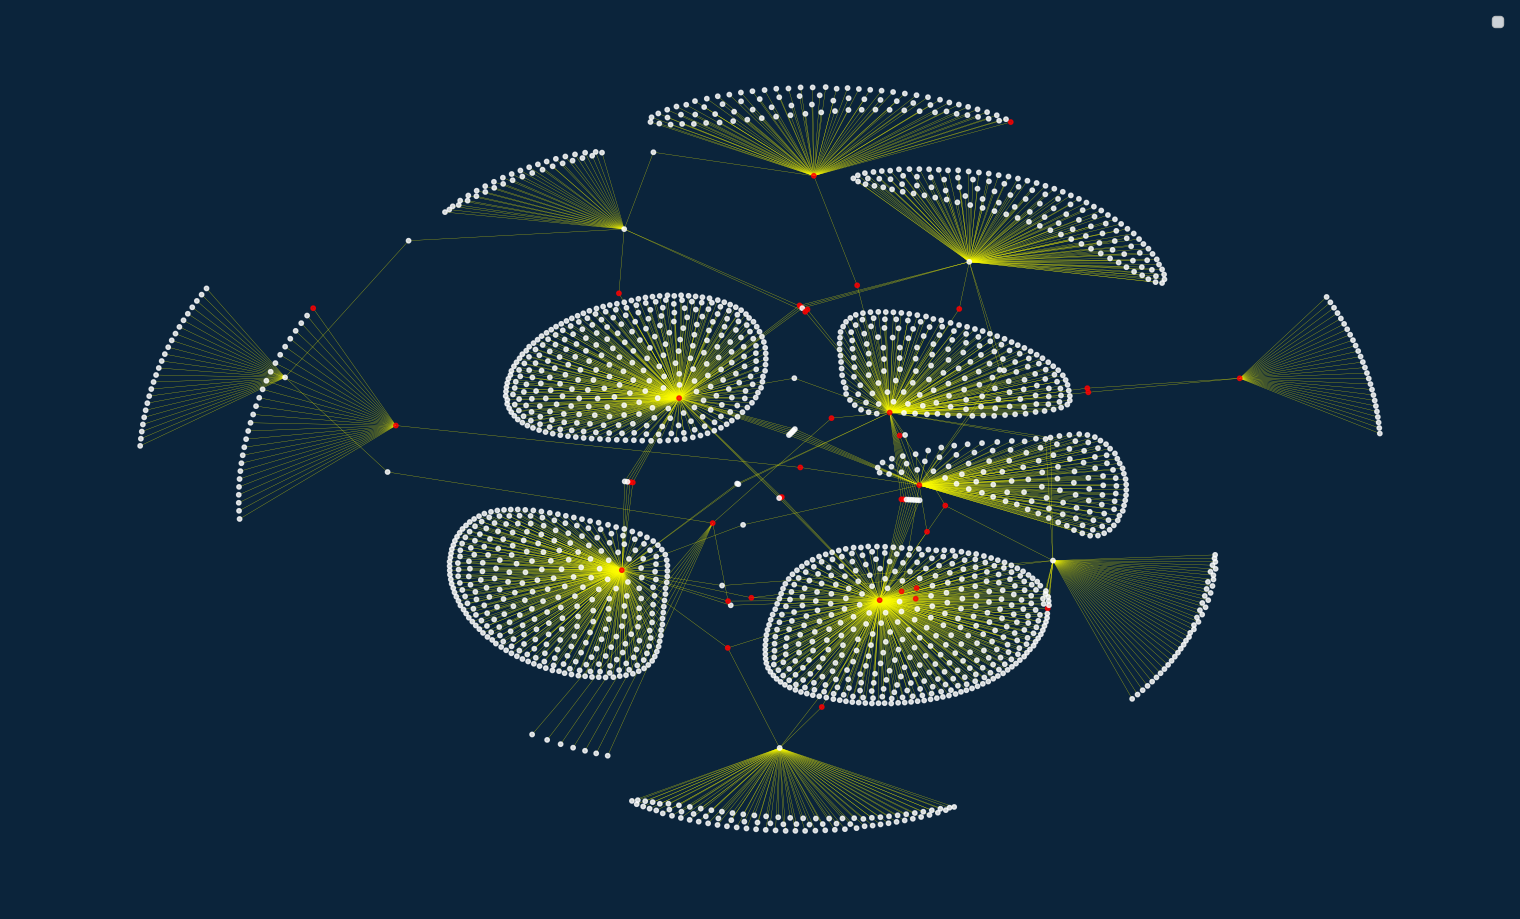

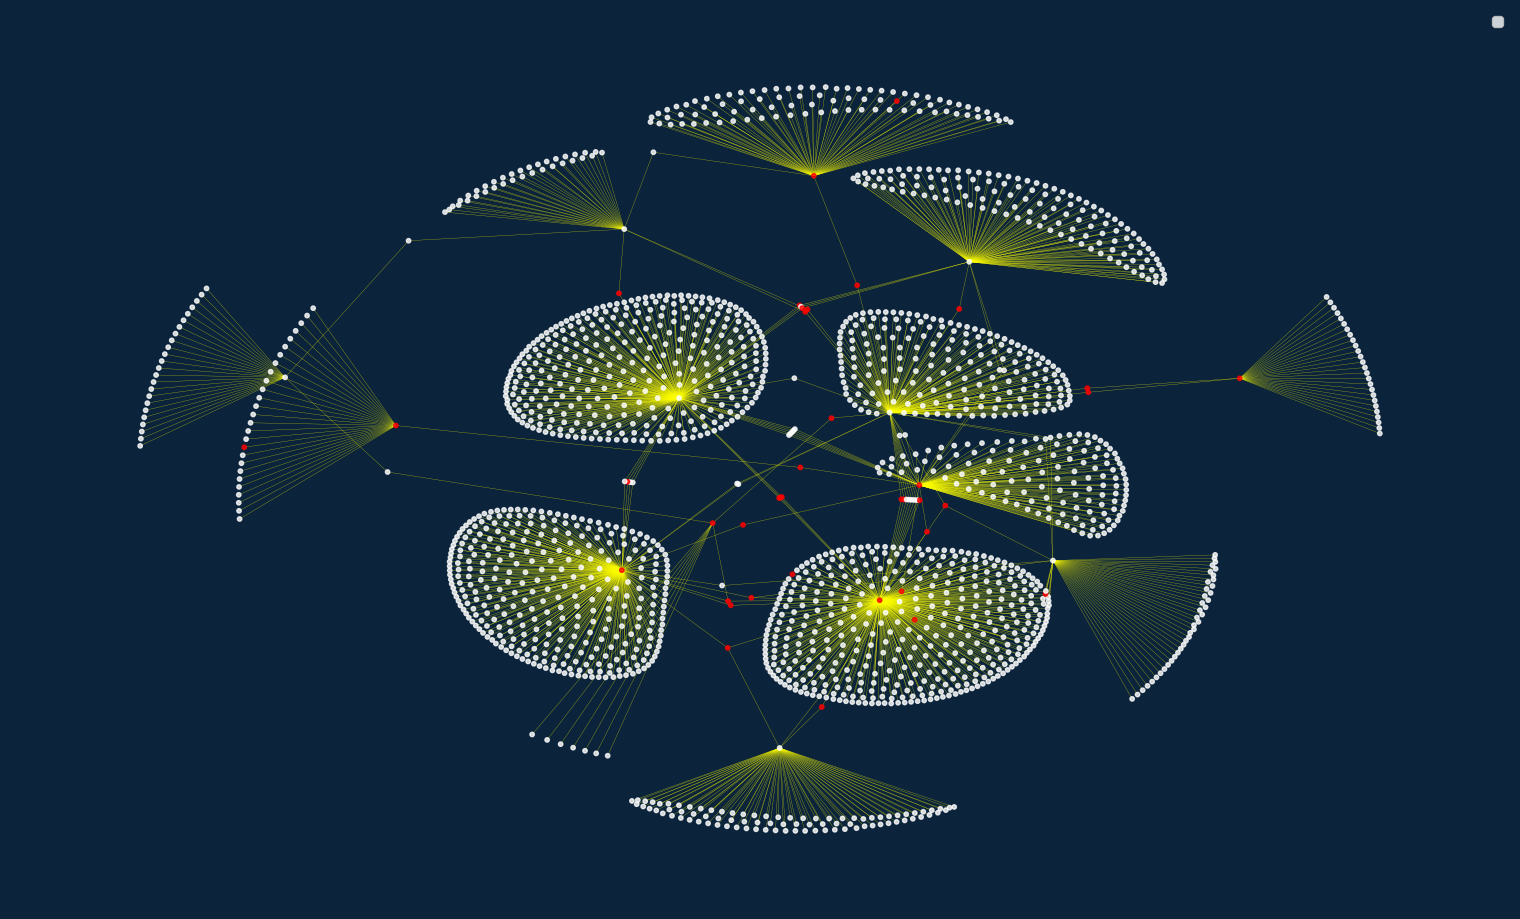

In [98]:
drawngroup('Betweeness_x',df_cent)
drawngroup('Closeness',df_cent)
drawngroup('EVC', df_cent)

In [118]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin